# Toko Baju
# Nama Kelompok:
# 1. Achmad Fadlan Bhahreisy (06.2018.1.06992)
# 2. Sita Fara Yunanda (06.2018.1.07083)

In [1]:
import os
import mysql.connector
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
import matplotlib as mpl
mpl.style.use('fivethirtyeight')
%matplotlib inline

# Desain Database

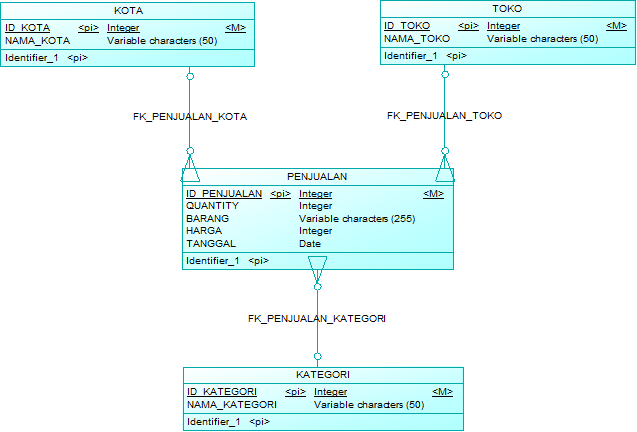

# A. Prepare Data

In [2]:
df = pd.read_csv("baju_wanita.csv")
df

,city,jumlah_review,jumlah_view,location,price,product_id,quantity_sold,rating,shop_name,subcategory,title,Tanggal Pembelian,quantity
0,Jakarta,1231,"90,600",Jakarta,53000,246580930,3969,5,Chel&#39;z Shop,Piyama,Baju Tidur Cewek-Wanita Piyama Pajamas Satin M...,28-12-2018,3969
1,Kota Bandung,551,"69,100",Kota Bandung,47000,210908812,1792,5,Openshop,Blouse,Atasan Wanita Zara Puff Blouse Tunik Baju Musl...,28-12-2018,1792
2,Kota Surakarta,442,"55,400",Kota Surakarta,20000,71957699,2690,4,Yona Retail,Daster,Daster Midi - Baju Tidur Wanita Dress Motif Mu...,26-12-2018,2690
3,Jakarta,123,"47,700",Jakarta,78000,33447414,277,4,CASHYUPHORIA SHOP,Kemeja,baju atasan kemeja tunik wanita lengan panjang...,25-12-2018,277
4,Kota Bandung,115,44000,Kota Bandung,60000,222820000,286,4,Hijab Update,Kemeja,Kemeja putih - Baju busui - Atasan wanita mura...,24-12-2018,286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4498,Jakarta,33,0,Jakarta,131500,366339754,99,5,Toko Adela Aloysius,Sweater,Couple Sweater Pasangan Wanita Pria Baju Atasa...,13-01-2018,99
4499,Jakarta,33,0,Jakarta,239900,363772675,99,5,Toko Wisly Wis,Jumpsuit,Jumpsuit Jumbo Wanita Bigsize Big Size Panjang...,1-12-2018,99
4500,Jakarta,31,0,Jakarta,105000,358247047,99,5,Strong Woman,Kemeja,Baju Kemeja Wanita Jumbo Bigsize Big Size Leng...,1-10-2018,99
4501,Kota Tangerang Selatan,18,0,Kota Tangerang Selatan,50000,335503058,99,5,Michary Shop,Daster,Daster Tanktop Dress Tanktop Baju Tidur Wanita,1-9-2018,99


In [3]:
mydb = mysql.connector.connect(host="localhost",user="root",passwd="")
mycursor = mydb.cursor()

In [4]:
mycursor.execute("DROP DATABASE if exists tokobaju")
mycursor.execute("CREATE DATABASE tokobaju")

In [5]:
mycursor.execute("use tokobaju")

In [6]:
mycursor.execute("DROP TABLE if exists kota")
mycursor.execute("DROP TABLE if exists toko")
mycursor.execute("DROP TABLE if exists kategori")
mycursor.execute("DROP TABLE if exists penjualan")
mycursor.execute("create table kota(id_kota int primary key, nama_kota varchar(50) not null)")
mycursor.execute("create table toko(id_toko int primary key, nama_toko varchar(50) not null)")
mycursor.execute("create table kategori(id_kategori int primary key, nama_kategori varchar(50) not null)")
mycursor.execute("create table penjualan(id_penjualan int primary key, quantity int not null, barang varchar(255) not null, harga int not null, tanggal date not null, id_kota int not null, id_toko int not null, id_kategori int not null)")

In [7]:
mycursor.execute("desc penjualan")
print("tabel penjualan")
for penjualan in mycursor:
    print(penjualan)
    
mycursor.execute("desc kota")
print("tabel kota")
for kota in mycursor:
    print(kota)
    
mycursor.execute("desc kategori")
print("tabel kategori")
for kategori in mycursor:
    print(kategori)
    
mycursor.execute("desc toko")
print("tabel toko")
for toko in mycursor:
    print(toko)

tabel penjualan
('id_penjualan', 'int(11)', 'NO', 'PRI', None, '')
('quantity', 'int(11)', 'NO', '', None, '')
('barang', 'varchar(255)', 'NO', '', None, '')
('harga', 'int(11)', 'NO', '', None, '')
('tanggal', 'date', 'NO', '', None, '')
('id_kota', 'int(11)', 'NO', '', None, '')
('id_toko', 'int(11)', 'NO', '', None, '')
('id_kategori', 'int(11)', 'NO', '', None, '')
tabel kota
('id_kota', 'int(11)', 'NO', 'PRI', None, '')
('nama_kota', 'varchar(50)', 'NO', '', None, '')
tabel kategori
('id_kategori', 'int(11)', 'NO', 'PRI', None, '')
('nama_kategori', 'varchar(50)', 'NO', '', None, '')
tabel toko
('id_toko', 'int(11)', 'NO', 'PRI', None, '')
('nama_toko', 'varchar(50)', 'NO', '', None, '')


In [8]:
toko = df['shop_name'].unique()
kategori = df['subcategory'].unique()
kota = df['city'].unique()
penjualan = []
for i,j in df.iterrows():   
    t = -1
    for index, value in enumerate(toko):
        if value == j[8]:
            t = index+1
            break
    
    kat = -1
    for index, value in enumerate(kategori):
        if value == j[9]:
            kat = index+1
            break
        
    kot = -1
    for index, value in enumerate(kota):
        if value == j[0]:
            kot = index+1
    
    penjualan.append([j[12],j[10],j[4],datetime.datetime.strptime(j[11],'%d-%m-%Y').strftime('%Y-%m-%d'),  kot, t, kat])

In [9]:
mycursor.execute("delete from kota")
for index, i in enumerate(kota): 
    mycursor.execute("INSERT INTO KOTA VALUES(" + str(index+1) + ", '" + str(i) + "')")
    mydb.commit

In [10]:
mycursor.execute("delete from kategori")
for index, i in enumerate(kategori): 
    mycursor.execute("INSERT INTO KATEGORI VALUES(" + str(index+1) + ", '" + str(i) + "')")
    mydb.commit

In [11]:
mycursor.execute("delete from toko")
for index, i in enumerate(toko): 
    mycursor.execute("INSERT INTO TOKO VALUES(" + str(index+1) + ", '" + str(i) + "')")
mydb.commit


<bound method MySQLConnection.commit of <mysql.connector.connection.MySQLConnection object at 0x0000024753C26D00>>

In [12]:
mycursor.execute("delete from penjualan")
for index, i in enumerate(penjualan): 
    mycursor.execute("INSERT INTO PENJUALAN VALUES(" + str(index+1) + ", " + str(i[0]) + ",'" + str(i[1]) + "'," + str(i[2]) + ",'" + str(i[3]) + "'," + str(i[4]) + "," + str(i[5]) + "," + str(i[6]) + ")")
mydb.commit

<bound method MySQLConnection.commit of <mysql.connector.connection.MySQLConnection object at 0x0000024753C26D00>>

In [13]:
mycursor.execute("SELECT * FROM KOTA")

KOTA = []
for row in mycursor.fetchall():
    KOTA.append(row)
print("========================KOTA================================")
print(KOTA)
print("============================================================")

mycursor.execute("SELECT * FROM KATEGORI")
KATEGORI = []
for row in mycursor.fetchall():
    KATEGORI.append(row)
print("========================KATEGORI================================")
print(KATEGORI)
print("============================================================")

mycursor.execute("SELECT * FROM TOKO")
TOKO = []
for row in mycursor.fetchall():
    TOKO.append(row)
print("========================TOKO================================")
print(TOKO)
print("============================================================")

========================KOTA================================
[(1, 'Jakarta'), (2, 'Kota Bandung'), (3, 'Kota Surakarta'), (4, 'Kota Surabaya'), (5, 'Kab. Pekalongan'), (6, 'Kota Depok'), (7, 'Kota Banjar'), (8, 'Kota Denpasar'), (9, 'Kab. Bekasi'), (10, 'Kota Pekalongan'), (11, 'Kota Tangerang'), (12, 'Kota Cirebon'), (13, 'Kota Tangerang Selatan'), (14, 'Kab. Bandung'), (15, 'Kab. Banyumas'), (16, 'Kab. Tangerang'), (17, 'Kab. Pandeglang'), (18, 'Kota Yogyakarta'), (19, 'Kab. Klungkung'), (20, 'Kota Batam'), (21, 'Kab. Nganjuk'), (22, 'Kota Kediri'), (23, 'Kota Bekasi'), (24, 'Kab. Garut'), (25, 'Kab. Bandung Barat'), (26, 'Kota Bogor'), (27, 'Kota Malang'), (28, 'Kota Pasuruan'), (29, 'Kab. Blitar'), (30, 'Kota Medan'), (31, 'Kota Semarang'), (32, 'Kota Salatiga'), (33, 'Kab. Sukoharjo'), (34, 'Kab. Kudus'), (35, 'Kota Cimahi'), (36, 'Kota Batu'), (37, 'Kab. Bogor'), (38, 'Kab. Gianyar'), (39, 'Kab. Sidoarjo'), (40, 'Kab. Jepara'), (41, 'Kab. Sleman'), (42, 'Kab. Magetan'), (43, 'Kab

# B. Visualization

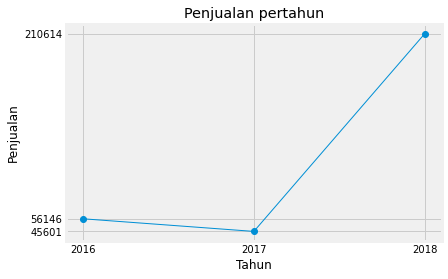

,Tahun,Penjualan
1,2016,56146
2,2017,45601
3,2018,210614


In [14]:
mycursor.execute('''SELECT year(tanggal), sum(quantity) as total
          FROM penjualan
          group by year(tanggal)
          order by year(tanggal) ASC
          ''')
penjualan = []
for row in mycursor.fetchall():
    penjualan.append(row)

np_penjualan = np.array(penjualan)
plt.plot([ int(x[0]) for x in np_penjualan[:,:]], [ int(x[1]) for x in np_penjualan[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_penjualan[:,:]], [ int(x[0]) for x in np_penjualan[:,:]])
plt.yticks([ int(x[1]) for x in np_penjualan[:,:]], [ int(x[1]) for x in np_penjualan[:,:]])
plt.xlabel('Tahun')
plt.ylabel('Penjualan')
plt.title("Penjualan pertahun")
plt.show()

df = pd.DataFrame([ x for x in np_penjualan[:,:]])
df.columns = ['Tahun', 'Penjualan']
df.index = np.arange(1,len(df)+1)
df

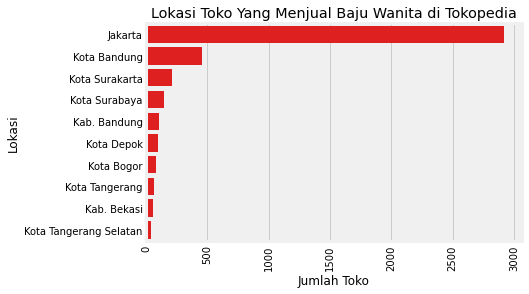

In [15]:
df = pd.read_csv("baju_wanita.csv")
shop_name_location = df[['shop_name', 'location']]
shop_per_location = shop_name_location.groupby(['location']).count()
sorting_shop_location = shop_per_location.sort_values(by='shop_name',ascending=False).reset_index()
sns.barplot(x='shop_name',y='location',data=sorting_shop_location[:10],color="red")
plt.xlabel("Jumlah Toko")
plt.ylabel("Lokasi")
plt.title("Lokasi Toko Yang Menjual Baju Wanita di Tokopedia")
plt.xticks(rotation='vertical')
plt.show()

In [16]:
mycursor.execute('''SELECT kota.nama_kota, sum(penjualan.quantity) as total
          FROM penjualan
          join kota on penjualan.id_kota = kota.id_kota
          group by kota.nama_kota
          order by kota.nama_kota ASC
          ''')
penjualan = []
for row in mycursor.fetchall():
    penjualan.append(row)
np_penjualan = np.array(penjualan)
print("========================PENJUALAN PERKOTA================================")
df = pd.DataFrame([ x for x in np_penjualan[:,:]],columns = ['Kota', 'Penjualan'])
df.index = np.arange(1,len(df)+1)
df.head(10)


========================PENJUALAN PERKOTA================================


,Kota,Penjualan
1,Jakarta,140918
2,Kab. Bandung,36121
3,Kab. Bandung Barat,134
4,Kab. Bantul,24
5,Kab. Banyumas,826
6,Kab. Batang,125
7,Kab. Bekasi,1891
8,Kab. Blitar,10584
9,Kab. Bogor,319
10,Kab. Bojonegoro,2


In [17]:
print("========================PENJUALAN TERBANYAK================================")
x = pd.to_numeric(df['Penjualan'])
print(df.loc[x.idxmax()])
print("========================PENJUALAN TERENDAH================================")
y = pd.to_numeric(df['Penjualan'])
print(df.loc[y.idxmin()])

========================PENJUALAN TERBANYAK================================
Kota         Jakarta
Penjualan     140918
Name: 1, dtype: object
========================PENJUALAN TERENDAH================================
Kota         Kab. Sukoharjo
Penjualan                 0
Name: 28, dtype: object


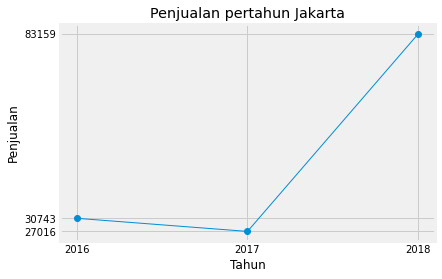

,Tahun,Penjualan Jakarta
1,2016,30743
2,2017,27016
3,2018,83159


In [18]:
kota = 'Jakarta'
mycursor.execute('''SELECT year(tanggal), sum(quantity) as total
          FROM penjualan
          join kota on kota.id_kota = penjualan.id_kota
          where nama_kota = "''' + str(kota) +'''"
          group by year(tanggal)
          order by year(tanggal) ASC
          ''')
penjualan = []
for row in mycursor.fetchall():
    penjualan.append(row)

np_penjualan = np.array(penjualan)
plt.plot([ int(x[0]) for x in np_penjualan[:,:]], [ int(x[1]) for x in np_penjualan[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_penjualan[:,:]], [ int(x[0]) for x in np_penjualan[:,:]])
plt.yticks([ int(x[1]) for x in np_penjualan[:,:]], [ int(x[1]) for x in np_penjualan[:,:]])
plt.xlabel('Tahun')
plt.ylabel('Penjualan')
plt.title("Penjualan pertahun Jakarta")
plt.show()

df = pd.DataFrame([ x for x in np_penjualan[:,:]])
df.columns = ['Tahun', 'Penjualan Jakarta']
df.index = np.arange(1,len(df)+1)
df

In [19]:
mycursor.execute('''SELECT toko.nama_toko, sum(penjualan.quantity) as total
          FROM penjualan
          join toko on penjualan.id_toko = toko.id_toko
          group by toko.nama_toko
          order by toko.nama_toko ASC
          ''')
penjualan = []
for row in mycursor.fetchall():
    penjualan.append(row)
np_penjualan = np.array(penjualan)
print("========================PENJUALAN PERTOKO================================")
df = pd.DataFrame([ x for x in np_penjualan[:,:]])
df.columns = ['Toko', 'Penjualan']
df.index = np.arange(1,len(df)+1)
df.head(10)

========================PENJUALAN PERTOKO================================


,Toko,Penjualan
1,Bintang Babydoll,34
2,21gillionscollection,0
3,22 Fashion Holic,1
4,3ceg,175
5,8teen_cloth,0
6,AA Kasimura,562
7,Aaqilah Shop,306
8,ABC_OLSHOP,40
9,Ada Fashion Official,0
10,ADF Counter,0


In [20]:
print("========================PENJUALAN TERBANYAK================================")
x = pd.to_numeric(df['Penjualan'])
print(df.loc[x.idxmax()])
print("========================PENJUALAN TERENDAH================================")
y = pd.to_numeric(df['Penjualan'])
print(df.loc[y.idxmin()])

========================PENJUALAN TERBANYAK================================
Toko         Haamidah Shop
Penjualan            51084
Name: 345, dtype: object
========================PENJUALAN TERENDAH================================
Toko         21gillionscollection
Penjualan                       0
Name: 2, dtype: object


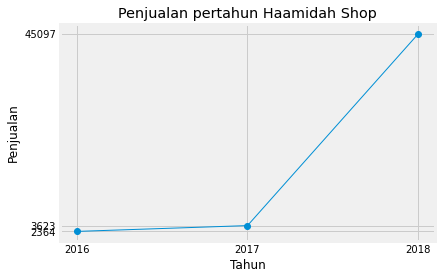

,Tahun,Penjualan Pertahun Haamidah Shop
1,2016,2364
2,2017,3623
3,2018,45097


In [21]:
toko = 'Haamidah Shop'
mycursor.execute('''SELECT year(tanggal), sum(quantity) as total
          FROM penjualan
          join toko on toko.id_toko= penjualan.id_toko
          where nama_toko = "''' + str(toko) +'''"
          group by year(tanggal)
          order by year(tanggal) ASC
          ''')
penjualan = []
for row in mycursor.fetchall():
    penjualan.append(row)

np_penjualan = np.array(penjualan)
plt.plot([ int(x[0]) for x in np_penjualan[:,:]], [ int(x[1]) for x in np_penjualan[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_penjualan[:,:]], [ int(x[0]) for x in np_penjualan[:,:]])
plt.yticks([ int(x[1]) for x in np_penjualan[:,:]], [ int(x[1]) for x in np_penjualan[:,:]])
plt.xlabel('Tahun')
plt.ylabel('Penjualan')
plt.title("Penjualan pertahun Haamidah Shop")
plt.show()

df = pd.DataFrame([ x for x in np_penjualan[:,:]])
df.columns = ['Tahun', 'Penjualan Pertahun Haamidah Shop']
df.index = np.arange(1,len(df)+1)
df

In [22]:
mycursor.execute('''SELECT kategori.nama_kategori, sum(penjualan.quantity) as total
          FROM penjualan
          join kategori on penjualan.id_kategori = kategori.id_kategori
          group by kategori.nama_kategori
          order by kategori.nama_kategori ASC
          ''')
penjualan = []
for row in mycursor.fetchall():
    penjualan.append(row)
np_penjualan = np.array(penjualan)
print("========================PENJUALAN PERKATEGORI================================")
df = pd.DataFrame([ x for x in np_penjualan[:,:]],columns = ['Kategori', 'Penjualan'])
df.index = np.arange(1,len(df)+1)
df.head(10)

========================PENJUALAN PERKATEGORI================================


,Kategori,Penjualan
1,Backpack,5
2,Baju Couple,2259
3,Batik Couple,497
4,Blazer,4719
5,Blouse,78927
6,Blouse Batik,4597
7,BRA,285
8,Bros,48
9,Cardigan,5522
10,Celana Dalam,1201


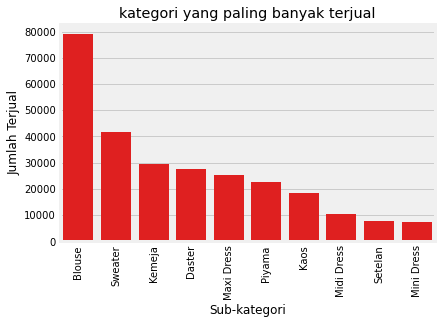

In [23]:
df = pd.read_csv("baju_wanita.csv")
subcategory_quantity_sold = df[['subcategory', 'quantity_sold']]
subcategory_quantity_sold.head()
quantity_sold_per_subcategory = subcategory_quantity_sold.groupby(['subcategory']).sum()
quantity_sold_per_subcategory.head()
subcategory_quantity_sold = quantity_sold_per_subcategory.sort_values(by='quantity_sold',ascending=False).reset_index()
subcategory_quantity_sold.head()
sns.barplot(x='subcategory',y='quantity_sold',data=subcategory_quantity_sold[:10],color="red")
plt.xlabel("Sub-kategori")
plt.ylabel("Jumlah Terjual")
plt.title("kategori yang paling banyak terjual")
plt.xticks(rotation='vertical')
plt.show()

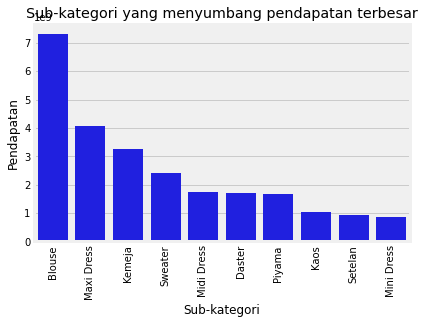

In [24]:
df['product_revenue'] = df.price*df.quantity_sold
subcategory_revenue = df[['subcategory', 'product_revenue']]
product_revenue_per_subcategory = subcategory_revenue.groupby(['subcategory']).sum()
sorting_subcategory_product_revenue = product_revenue_per_subcategory.sort_values(by='product_revenue',ascending=False).reset_index()
sns.barplot(x='subcategory',y='product_revenue',data=sorting_subcategory_product_revenue[:10],color="blue")
plt.xlabel("Sub-kategori")
plt.ylabel("Pendapatan")
plt.title("Sub-kategori yang menyumbang pendapatan terbesar")
plt.xticks(rotation='vertical')
plt.show()

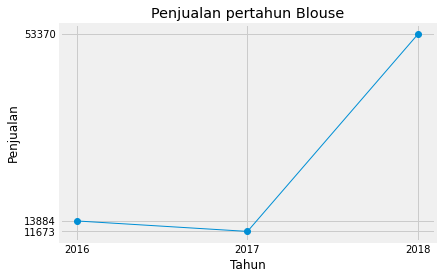

,Tahun,Penjualan Pertahun Blouse
1,2016,13884
2,2017,11673
3,2018,53370


In [25]:
kategori = 'Blouse'
mycursor.execute('''SELECT year(tanggal), sum(quantity) as total
          FROM penjualan
          join kategori on kategori.id_kategori= penjualan.id_kategori
          where nama_kategori = "''' + str(kategori) +'''"
          group by year(tanggal)
          order by year(tanggal) ASC
          ''')
penjualan = []
for row in mycursor.fetchall():
    penjualan.append(row)

np_penjualan = np.array(penjualan)
plt.plot([ int(x[0]) for x in np_penjualan[:,:]], [ int(x[1]) for x in np_penjualan[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_penjualan[:,:]], [ int(x[0]) for x in np_penjualan[:,:]])
plt.yticks([ int(x[1]) for x in np_penjualan[:,:]], [ int(x[1]) for x in np_penjualan[:,:]])
plt.xlabel('Tahun')
plt.ylabel('Penjualan')
plt.title("Penjualan pertahun Blouse")
plt.show()

df = pd.DataFrame([ x for x in np_penjualan[:,:]])
df.columns = ['Tahun', 'Penjualan Pertahun Blouse']
df.index = np.arange(1,len(df)+1)
df